In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:
df=pd.read_csv("drive/MyDrive/Colab Notebooks/parkinsons.csv")

In [33]:

print("this shows the dimension of the dataset",df.shape)
print("there are 195 rows and 24 columns")

this shows the dimension of the dataset (195, 24)
there are 195 rows and 24 columns


In [34]:
print("This are the feature *****")
df.columns


This are the feature *****


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [35]:
df.info()
print("Non-Null Count shows null value")
print("Dtype shows type of data present in the dataframe")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [36]:
print("In this data set there is no null value")
df.isnull().sum()

In this data set there is no null value


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [37]:
#we can drop the name columns
df.drop("name",axis=1,inplace=True)

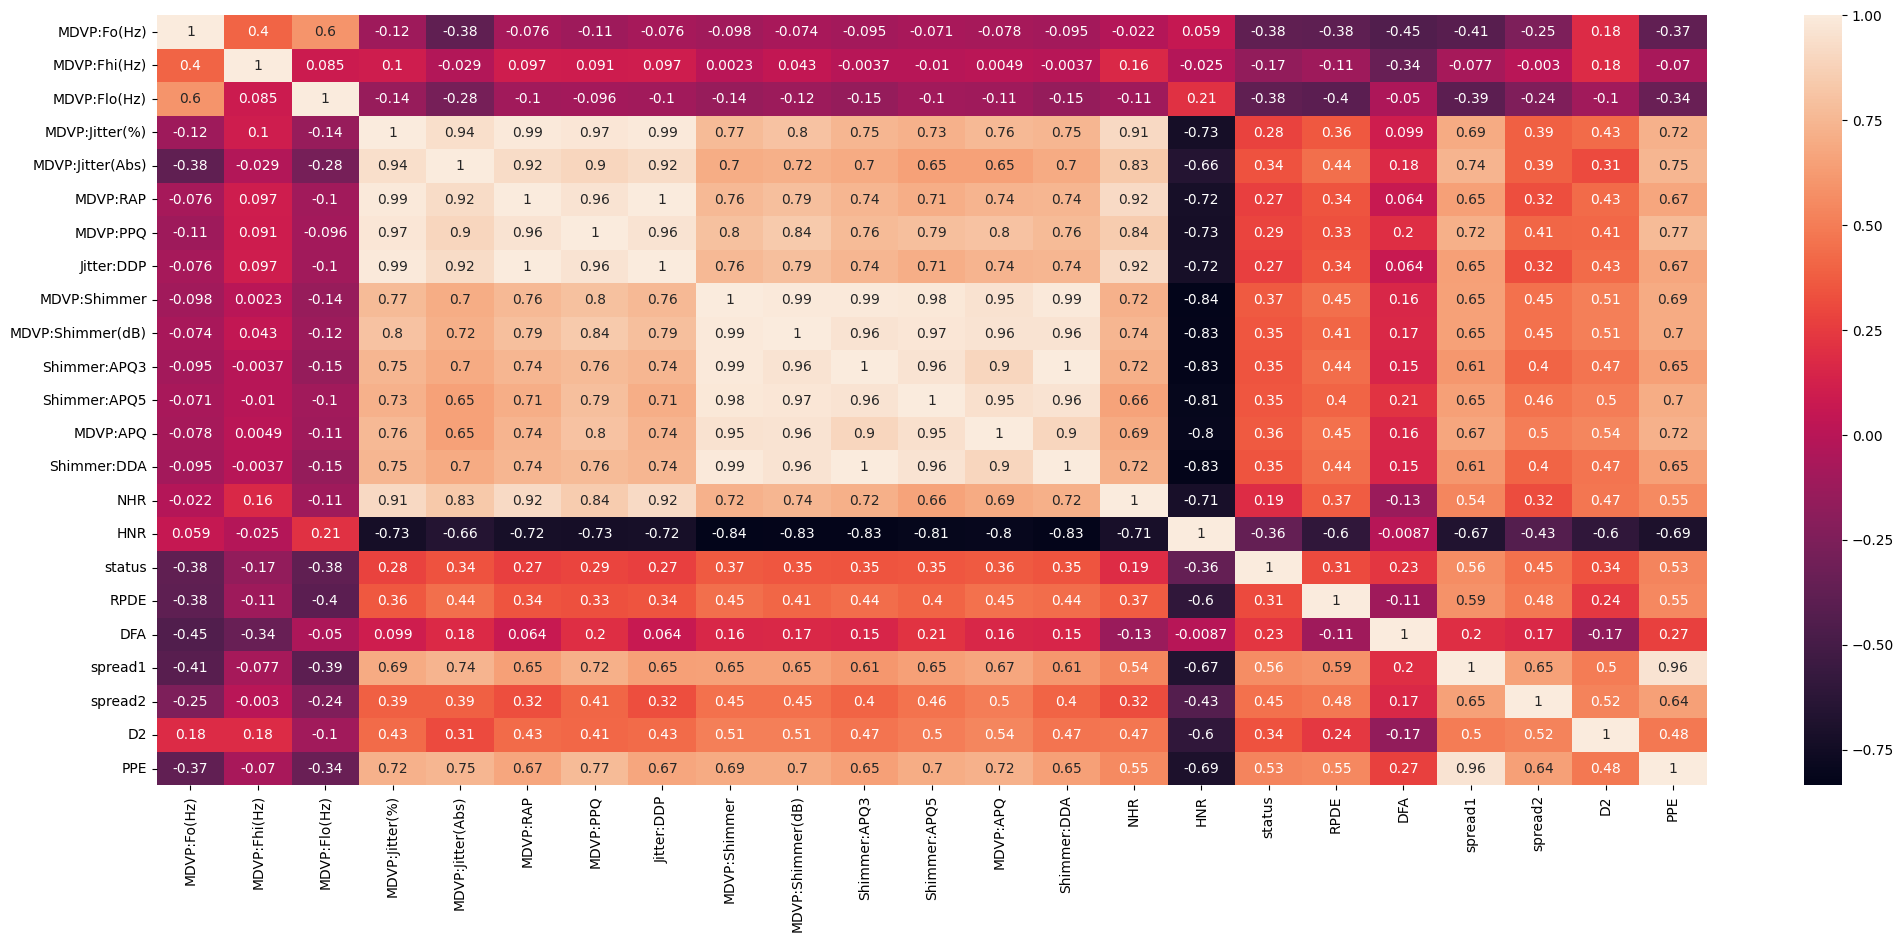

In [38]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
X=df.drop("status",axis=1)
Y=df["status"]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42)

Model Building


Logistic regration

In [41]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)
pred=model_1.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
accuracy_score(y_test,pred)

0.8775510204081632

In [43]:
model_2=RandomForestClassifier()
model_2.fit(x_train,y_train)
pred_2=model_2.predict(x_test)
accuracy_score(y_test,pred_2)

0.9387755102040817

In [44]:
model_3=SVC()
model_3.fit(x_train,y_train)
pred_3=model_3.predict(x_test)
accuracy_score(y_test,pred_3)

0.8367346938775511

As we can see Randomforest is performing better so we are going to use RandomForest

Lets optimize RandomForestClassifier

In [47]:
param_grid = {"n_estimators":[100,200,300],"max_depth":[4,8,12],
              "min_samples_split":[2,5,10],"max_features":["auto","sqrt"]}
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
best_model=grid_search.best_estimator_
best_params=grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [48]:
best_params

{'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

we can see the best hyperparameter for RandomForest

In [50]:
random_f_model=RandomForestClassifier(max_depth=12,max_features="sqrt",min_samples_split=2,n_estimators=100)
random_f_model.fit(x_train,y_train)
prediction=random_f_model.predict(x_test)
accuracy_score(y_test,prediction)

0.9387755102040817

In [ ]:
p=best_model.predict(x_test)
accuracy_score(y_test,p)

0.9183673469387755